In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
BATCH_SIZE = 32

In [0]:
(ds_train, ds_test), ds_info = tfds.load("fashion_mnist", split=['train', 'test'], with_info=True, shuffle_files=True, as_supervised=True)
num_training_examples = ds_info.splits['train'].num_examples
num_testing_examples = ds_info.splits['test'].num_examples

def normalize_img(image, label):
    """normalises images to range [0,1] and convert unit8 -> float32"""
    return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#print(ds_train)
ds_train = ds_train.cache()
#print(ds_train)
ds_train = ds_train.shuffle(num_training_examples)
#print(ds_train)
ds_train = ds_train.batch(BATCH_SIZE)
#print(ds_train)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)
#print(ds_train)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

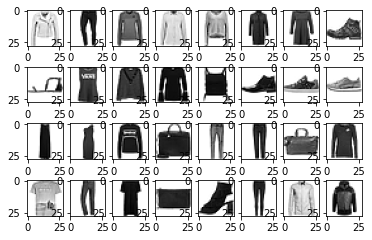

In [0]:
# Data Visualization
for image, label in ds_train.take(1):
    break
image = image.numpy()
reshaped_image = np.zeros((BATCH_SIZE, 28, 28))

for i in range(BATCH_SIZE):
    reshaped_image[i] = image[i].reshape((28, 28))
    plt.subplot(4, 8, i+1)
    plt.imshow(reshaped_image[i], cmap=plt.cm.binary)
#    plt.colorbar()
    plt.grid(False)
plt.show()

In [0]:
inputs = keras.Input(shape=(28, 28, 1), name='input_layer')
x = layers.Flatten(input_shape=(28, 28, 1), name='flatten_layer')(inputs)
x = layers.Dense(units=128, activation=tf.nn.relu, name='the_only_hidden_layer')(x)
outputs = layers.Dense(units=10, activation=tf.nn.softmax, name='output_layer')(x)  # because we have 10 classes

model = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_model')

Model: "fashion_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
the_only_hidden_layer (Dense (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


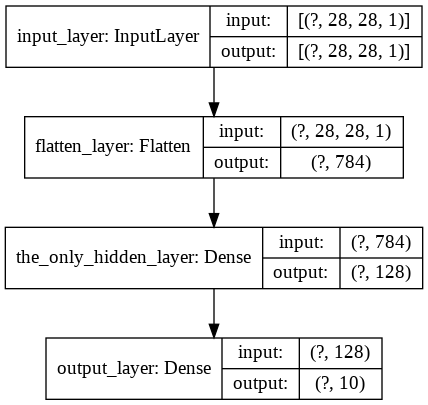

In [0]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.fit(ds_train, epochs=10, steps_per_epoch=math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2518 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [0]:
model.evaluate(ds_test, steps=math.ceil(num_testing_examples/BATCH_SIZE))

313/313 [==============================] - 2s 8ms/step - loss: 0.3542 - accuracy: 0.8722


[0.3541744649410248, 0.8722000122070312]

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']
# Predict
for test_images, test_labels in ds_test.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [0]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)
print(test_labels)

(32,)
[4 4 5 9 5 1 0 7 5 4 0 8 2 3 9 0 7 7 2 0 2 4 4 2 0 7 7 4 2 4 7 5]
[4 4 9 7 5 1 0 7 5 4 0 8 2 3 9 0 7 7 2 0 2 4 4 4 2 7 7 4 2 4 7 5]


In [0]:
predicted_class_names = [class_names[i] for i in predicted_classes]
true_class_names = [class_names[i] for i in test_labels]
print(predicted_class_names)
print(true_class_names)

['Coat', 'Coat', 'Sandal', 'Ankle_boot', 'Sandal', 'Trouser', 'T-shirt/top', 'Sneaker', 'Sandal', 'Coat', 'T-shirt/top', 'Bag', 'Pullover', 'Dress', 'Ankle_boot', 'T-shirt/top', 'Sneaker', 'Sneaker', 'Pullover', 'T-shirt/top', 'Pullover', 'Coat', 'Coat', 'Pullover', 'T-shirt/top', 'Sneaker', 'Sneaker', 'Coat', 'Pullover', 'Coat', 'Sneaker', 'Sandal']
['Coat', 'Coat', 'Ankle_boot', 'Sneaker', 'Sandal', 'Trouser', 'T-shirt/top', 'Sneaker', 'Sandal', 'Coat', 'T-shirt/top', 'Bag', 'Pullover', 'Dress', 'Ankle_boot', 'T-shirt/top', 'Sneaker', 'Sneaker', 'Pullover', 'T-shirt/top', 'Pullover', 'Coat', 'Coat', 'Coat', 'Pullover', 'Sneaker', 'Sneaker', 'Coat', 'Pullover', 'Coat', 'Sneaker', 'Sandal']
